In [34]:
!pip show torch

In [35]:
import os
from PIL import Image, ImageDraw, ImageFont
import torch # -> 2.5.1+cu121
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

In [36]:
model = torch.load("model_2_2.pth")

In [37]:
image_folder = "..\\data\\split_data\\images\\test"
label_folder = "..\\data\\split_data\\labels\\test"

image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith((".jpg", ".png"))]

label_paths = [os.path.join(label_folder, f.replace('.jpg', '.txt').replace('.png', '.txt')) for f in os.listdir(image_folder) if f.endswith((".jpg", ".png"))]

In [38]:
results = []
batch_size = 2

for i in range(0, len(image_paths), batch_size):
    batch_paths = image_paths[i:i + batch_size]
    try:
        batch_results = model.predict(batch_paths)
        results.extend(batch_results)
    except torch.cuda.OutOfMemoryError:
        print(f"OOM at batch {i}")
        torch.cuda.empty_cache()

In [39]:
def show_prediction(image_path, detection_result, threshold=0.5):
    image = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    boxes = detection_result.xyxy
    scores = detection_result.confidence
    labels = detection_result.class_id

    for box, score, label in zip(boxes, scores, labels):
        if score >= threshold:
            x0, y0, x1, y1 = box
            draw.rectangle([x0, y0, x1, y1], outline="red", width=2)
            draw.text((x0, y0), f"Class {label} ({score:.2f})", fill="red", font=font)

    plt.imshow(image)
    plt.axis("off")
    plt.show()

In [40]:
def load_ground_truth(label_path, image_size):
    boxes = []
    with open(label_path, 'r') as f:
        for line in f.readlines():
            cls, xc, yc, w, h = map(float, line.strip().split())
            x1 = (xc - w / 2) * image_size[0]
            y1 = (yc - h / 2) * image_size[1]
            x2 = (xc + w / 2) * image_size[0]
            y2 = (yc + h / 2) * image_size[1]
            boxes.append((cls, x1, y1, x2, y2))
    return boxes

Ground truth boxes: [(0.0, 159.00024, 341.00032, 181.00008, 365.99999999999994), (0.0, 188.99975999999998, 338.99968, 208.99992, 358.99968), (1.0, 222.99984, 344.00000000000006, 243.99984, 368.99968), (1.0, 171.99984, 307.0, 189.99984, 325.99967999999996), (2.0, 238.00008000000003, 381.0, 259.99992000000003, 406.99999999999994), (2.0, 187.00008, 308.0, 208.99992, 328.0), (3.0, 220.00008, 375.0, 241.99991999999997, 396.00032), (3.0, 198.00024, 320.00032000000004, 220.00008, 343.0), (4.0, 223.00008, 297.99968, 247.99992, 319.0), (4.0, 258.00024, 305.99968, 280.00008, 327.0)]


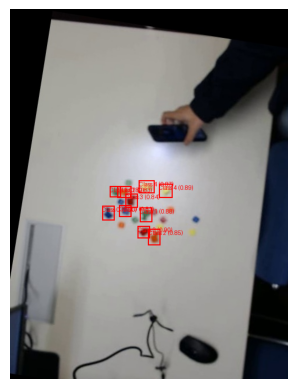

Ground truth boxes: [(0.0, 301.99992000000003, 253.99968, 322.00007999999997, 275.0), (0.0, 330.00023999999996, 246.0, 352.00007999999997, 273.00032), (1.0, 267.99984, 245.0, 288.99983999999995, 271.0), (1.0, 321.0, 291.00032, 339.0, 311.00032), (2.0, 253.00008000000003, 202.99968, 274.99992000000003, 230.99967999999996), (2.0, 302.00016, 289.0, 323.00016, 310.00032), (3.0, 291.00024, 271.99968, 313.00008, 297.99968), (3.0, 270.99984, 214.00032, 291.99984, 237.0), (4.0, 264.00024, 300.00032, 289.00008, 322.00032), (4.0, 233.00016, 292.00032, 254.00015999999997, 315.0)]


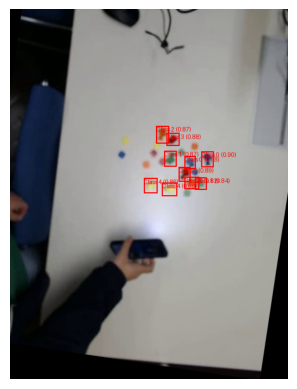

Ground truth boxes: [(0.0, 311.0, 238.00008, 333.99968, 256.99992), (0.0, 332.99968, 214.00008, 352.99968, 234.00024), (1.0, 303.00032, 219.00024, 320.0, 238.00008000000003), (1.0, 293.0, 192.0, 319.0, 213.0), (2.0, 274.0, 204.99984000000003, 294.0, 225.99984), (2.0, 281.0, 163.99992000000003, 302.00032, 190.00008), (3.0, 357.0, 202.00008, 378.00032, 220.99992), (3.0, 257.99968, 169.00008, 279.0, 190.99992), (4.0, 265.0, 276.00000000000006, 286.00032, 297.0), (4.0, 243.00032000000002, 268.00008, 267.00032, 288.00023999999996)]


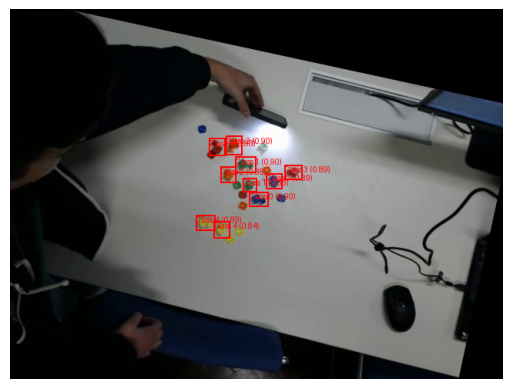

Ground truth boxes: [(0.0, 271.99992, 304.0, 287.99976000000004, 324.0), (0.0, 298.99992, 292.0, 317.99976, 308.99967999999996), (1.0, 312.00024, 328.0, 331.00008, 352.0), (1.0, 286.99992, 320.99999999999994, 304.00008, 335.0), (2.0, 331.99992, 351.0, 359.99976, 369.99968), (2.0, 291.99984, 349.00032000000004, 312.99984, 365.00032), (3.0, 325.00008, 371.00032, 348.00024, 391.00032), (3.0, 319.99992000000003, 270.0, 338.99976, 290.0), (4.0, 222.99984, 357.99968, 240.99984000000003, 379.0), (4.0, 218.99975999999998, 339.0, 238.99992, 356.99999999999994)]


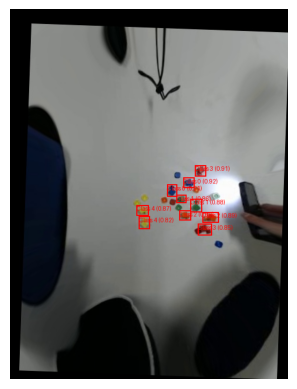

Ground truth boxes: [(0.0, 329.99968, 199.00008, 351.0, 216.00024000000002), (0.0, 347.00032, 168.00024, 364.0, 187.00008000000003), (1.0, 319.0, 180.99984, 333.00000000000006, 198.99983999999998), (1.0, 303.00032, 153.99984, 327.00032, 171.99984), (2.0, 288.0, 172.00008, 304.99968, 192.00024), (2.0, 287.00032, 127.00008000000001, 304.0, 151.99992), (3.0, 367.0, 149.99975999999998, 385.99968, 166.99992), (3.0, 265.0, 137.00016000000002, 283.0, 158.00016), (4.0, 294.00032000000004, 250.00008000000003, 312.00032, 270.00023999999996), (4.0, 271.0, 246.99983999999995, 292.00032, 264.99984)]


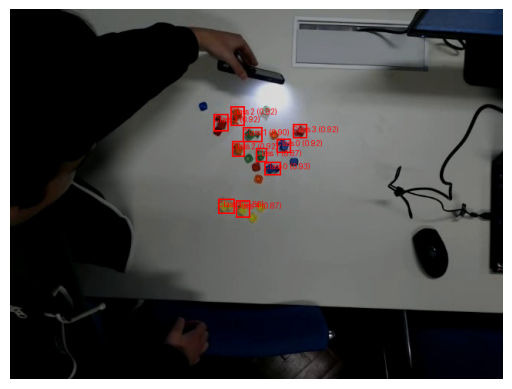

In [ ]:
max_images = 5

for path, label_path, prediction in zip(image_paths[:max_images], label_paths[:max_images], results[:max_images]):
    image = Image.open(path).convert("RGB")
    gt_boxes = load_ground_truth(label_path, image.size)

    if isinstance(prediction, tuple):
        prediction = prediction[0]
    
    show_prediction(path, prediction)

In [42]:
all_data = []

for img_path, lbl_path, pred in zip(image_paths, label_paths, results):
    if isinstance(pred, tuple):
        pred = pred[0]

    image = Image.open(img_path).convert("RGB")
    gt = load_ground_truth(lbl_path, image.size)

    all_data.append({
        "image": img_path,
        "predictions": {
            "boxes": pred.xyxy,
            "scores": pred.confidence,
            "labels": pred.class_id,
        },
        "ground_truth": gt
    })

In [43]:
def compute_iou(box1, box2):
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])
    
    interArea = max(0, xB - xA) * max(0, yB - yA)
    
    box1Area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2Area = (box2[2] - box2[0]) * (box2[3] - box2[1])
    
    iou = interArea/float(box1Area + box2Area - interArea + 1e-6)
    return iou

In [44]:
y_true = []
y_pred = []

class_names = ["blue", "green", "orange", "red", "yellow", "background"]

iou_threshold = 0.5
conf_threshold = 0.5

In [45]:
for data in all_data:
    gt = data["ground_truth"]
    pred_boxes = data["predictions"]["boxes"]
    pred_scores = data["predictions"]["scores"]
    pred_labels = data["predictions"]["labels"]

    matched_gt = set()

    for p_box, p_score, p_label in zip(pred_boxes, pred_scores, pred_labels):
        if p_score < conf_threshold:
            continue

        best_iou = 0
        best_gt_idx = -1

        for idx, (gt_label, *gt_box) in enumerate(gt):
            iou = compute_iou(p_box, gt_box)
            if iou > best_iou:
                best_iou = iou
                best_gt_idx = idx

        if best_iou >= iou_threshold and best_gt_idx not in matched_gt:
            y_true.append(class_names[int(gt[best_gt_idx][0])])
            y_pred.append(class_names[int(p_label)])
            matched_gt.add(best_gt_idx)
        else:
            y_true.append(class_names[-1])
            y_pred.append(class_names[int(p_label)])

    for idx, (gt_label, *gt_box) in enumerate(gt):
        if idx not in matched_gt:
            y_true.append(class_names[int(gt_label)])
            y_pred.append(class_names[-1])

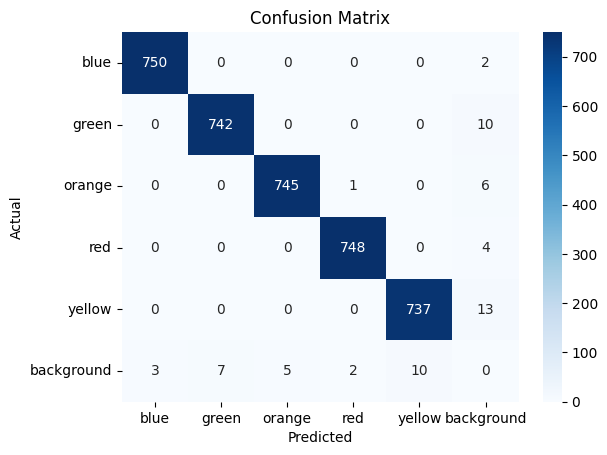

In [46]:
labels = class_names
cm = confusion_matrix(y_true, y_pred, labels=labels)

sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()